In [1]:
# import import_ipynb
# from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

# with the new api
from importnb import imports
with imports("ipynb"):
    from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_260A    float64
TANGARA_14D6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_260A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,
2023-10-30 00:00:30-05:00,17.0,24.0,10.0,4.0,NaN,6.0,5.0,11.0,4.0,24.0,17.0
2023-10-30 00:01:00-05:00,19.0,26.0,9.0,3.0,17.0,6.0,5.0,14.0,3.0,23.0,16.0
2023-10-30 00:01:30-05:00,20.0,26.0,9.0,3.0,17.0,7.0,6.0,20.0,5.0,22.0,15.0
2023-10-30 00:02:00-05:00,19.0,27.0,9.0,4.0,17.0,7.0,5.0,20.0,3.0,24.0,15.0
2023-10-30 00:02:30-05:00,19.0,27.0,8.0,3.0,17.0,7.0,5.0,22.0,5.0,21.0,15.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_260A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,1300.000000,2667.000000,2369.000000,2497.000000,2480.000000,2620.000000,2632.000000,2543.000000,2621.000000,2659.000000,2501.000000
mean,15.665385,12.449194,8.492191,8.063276,8.846371,8.127481,7.139438,9.416044,8.497138,11.050771,12.139144
std,3.226793,6.574687,4.612982,5.921766,3.842842,2.857933,2.872948,5.521285,6.651557,5.856901,5.811354
min,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,13.000000,7.000000,7.000000,3.000000,7.000000,6.000000,5.000000,5.000000,3.000000,6.000000,10.000000
50%,16.000000,13.000000,8.000000,6.000000,9.000000,8.000000,7.000000,8.000000,8.000000,11.000000,11.000000
75%,18.000000,17.000000,11.000000,11.000000,11.000000,10.000000,9.000000,14.000000,12.000000,14.000000,15.000000
max,24.000000,31.000000,22.000000,25.000000,17.000000,16.000000,15.000000,27.000000,28.000000,27.000000,25.000000


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_260A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,
2023-10-30 00:00:30-05:00,62.0,77.0,42.0,17.0,NaN,25.0,21.0,46.0,17.0,77.0,62.0
2023-10-30 00:01:00-05:00,66.0,81.0,38.0,13.0,62.0,25.0,21.0,55.0,13.0,74.0,60.0
2023-10-30 00:01:30-05:00,68.0,81.0,38.0,13.0,62.0,30.0,25.0,68.0,21.0,72.0,58.0
2023-10-30 00:02:00-05:00,66.0,83.0,38.0,17.0,62.0,30.0,21.0,68.0,13.0,77.0,58.0
2023-10-30 00:02:30-05:00,66.0,83.0,34.0,13.0,62.0,30.0,21.0,72.0,21.0,70.0,58.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_260A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,1300.000000,2667.000000,2369.000000,2497.000000,2480.000000,2620.000000,2632.000000,2543.000000,2621.000000,2659.000000,2501.000000
mean,58.436154,46.715036,34.822288,31.877853,36.616935,34.016031,30.004939,37.138026,32.946967,42.838661,46.686126
std,7.663622,20.806466,17.129970,20.536063,14.679830,11.483164,11.759741,19.216565,22.541562,19.488993,18.331291
min,34.000000,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,5.000000,5.000000
25%,53.000000,30.000000,30.000000,13.000000,30.000000,25.000000,21.000000,21.000000,13.000000,25.000000,42.000000
50%,60.000000,53.000000,34.000000,25.000000,38.000000,34.000000,30.000000,34.000000,34.000000,46.000000,46.000000
75%,64.000000,62.000000,46.000000,46.000000,46.000000,42.000000,38.000000,55.000000,50.000000,55.000000,58.000000
max,77.000000,91.000000,72.000000,79.000000,62.000000,60.000000,58.000000,83.000000,85.000000,83.000000,79.000000


## Histograms

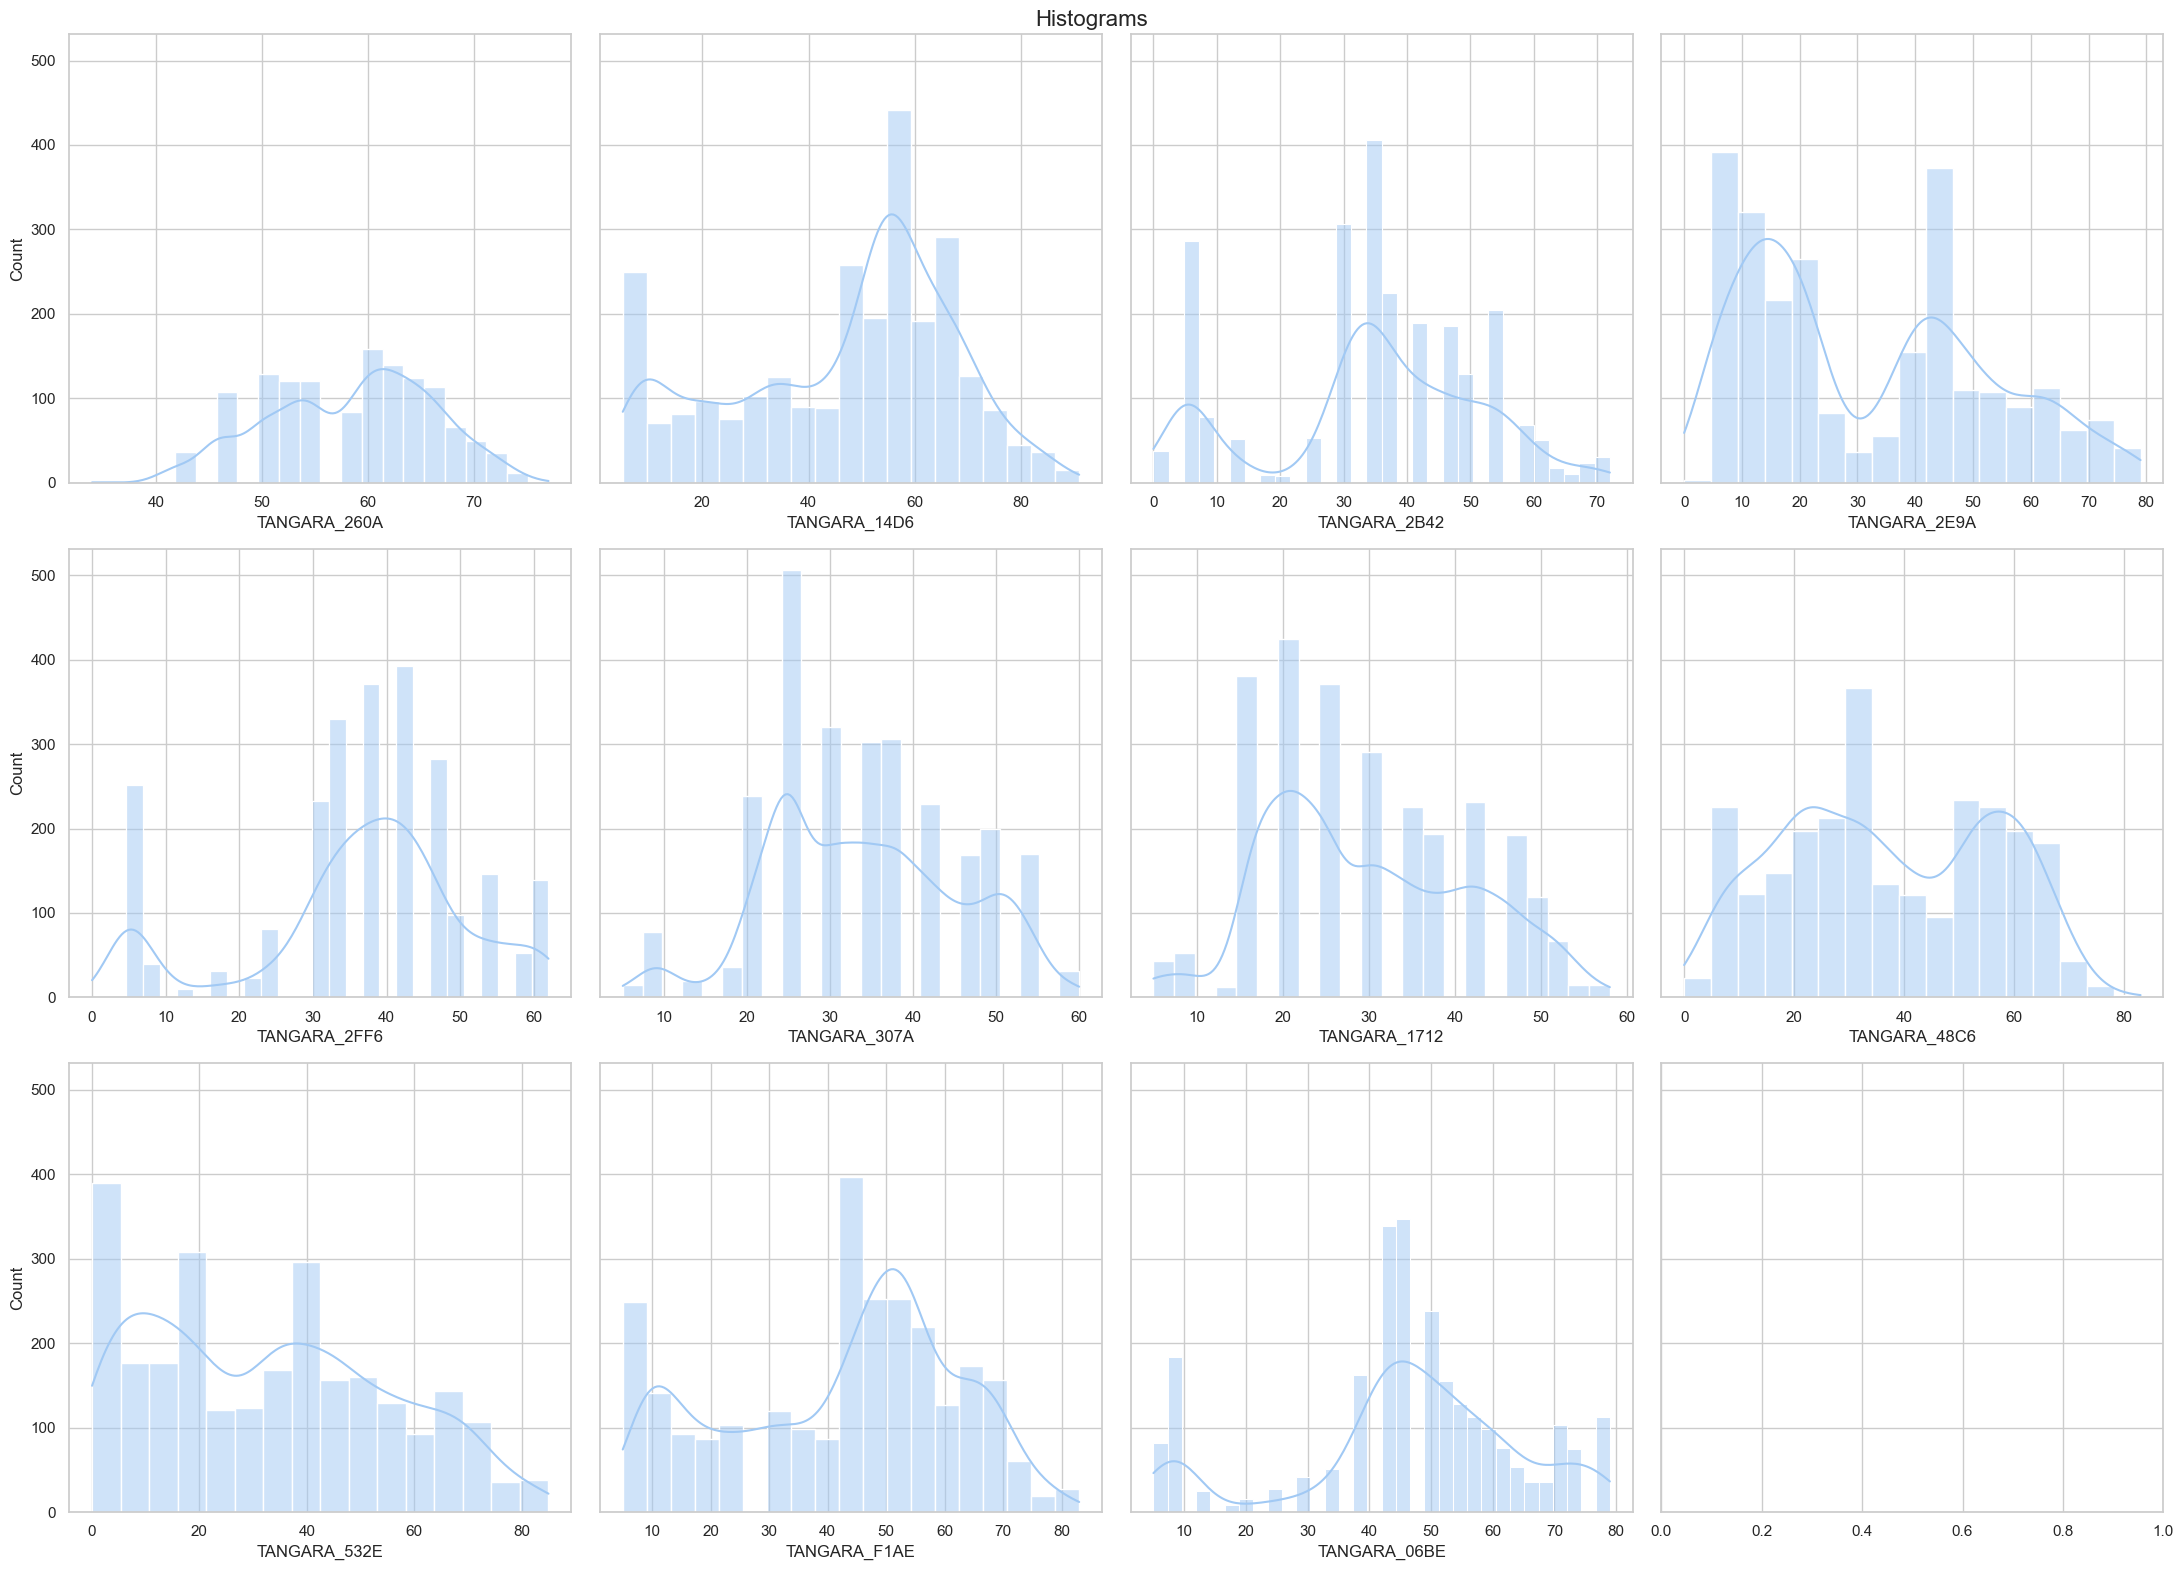

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

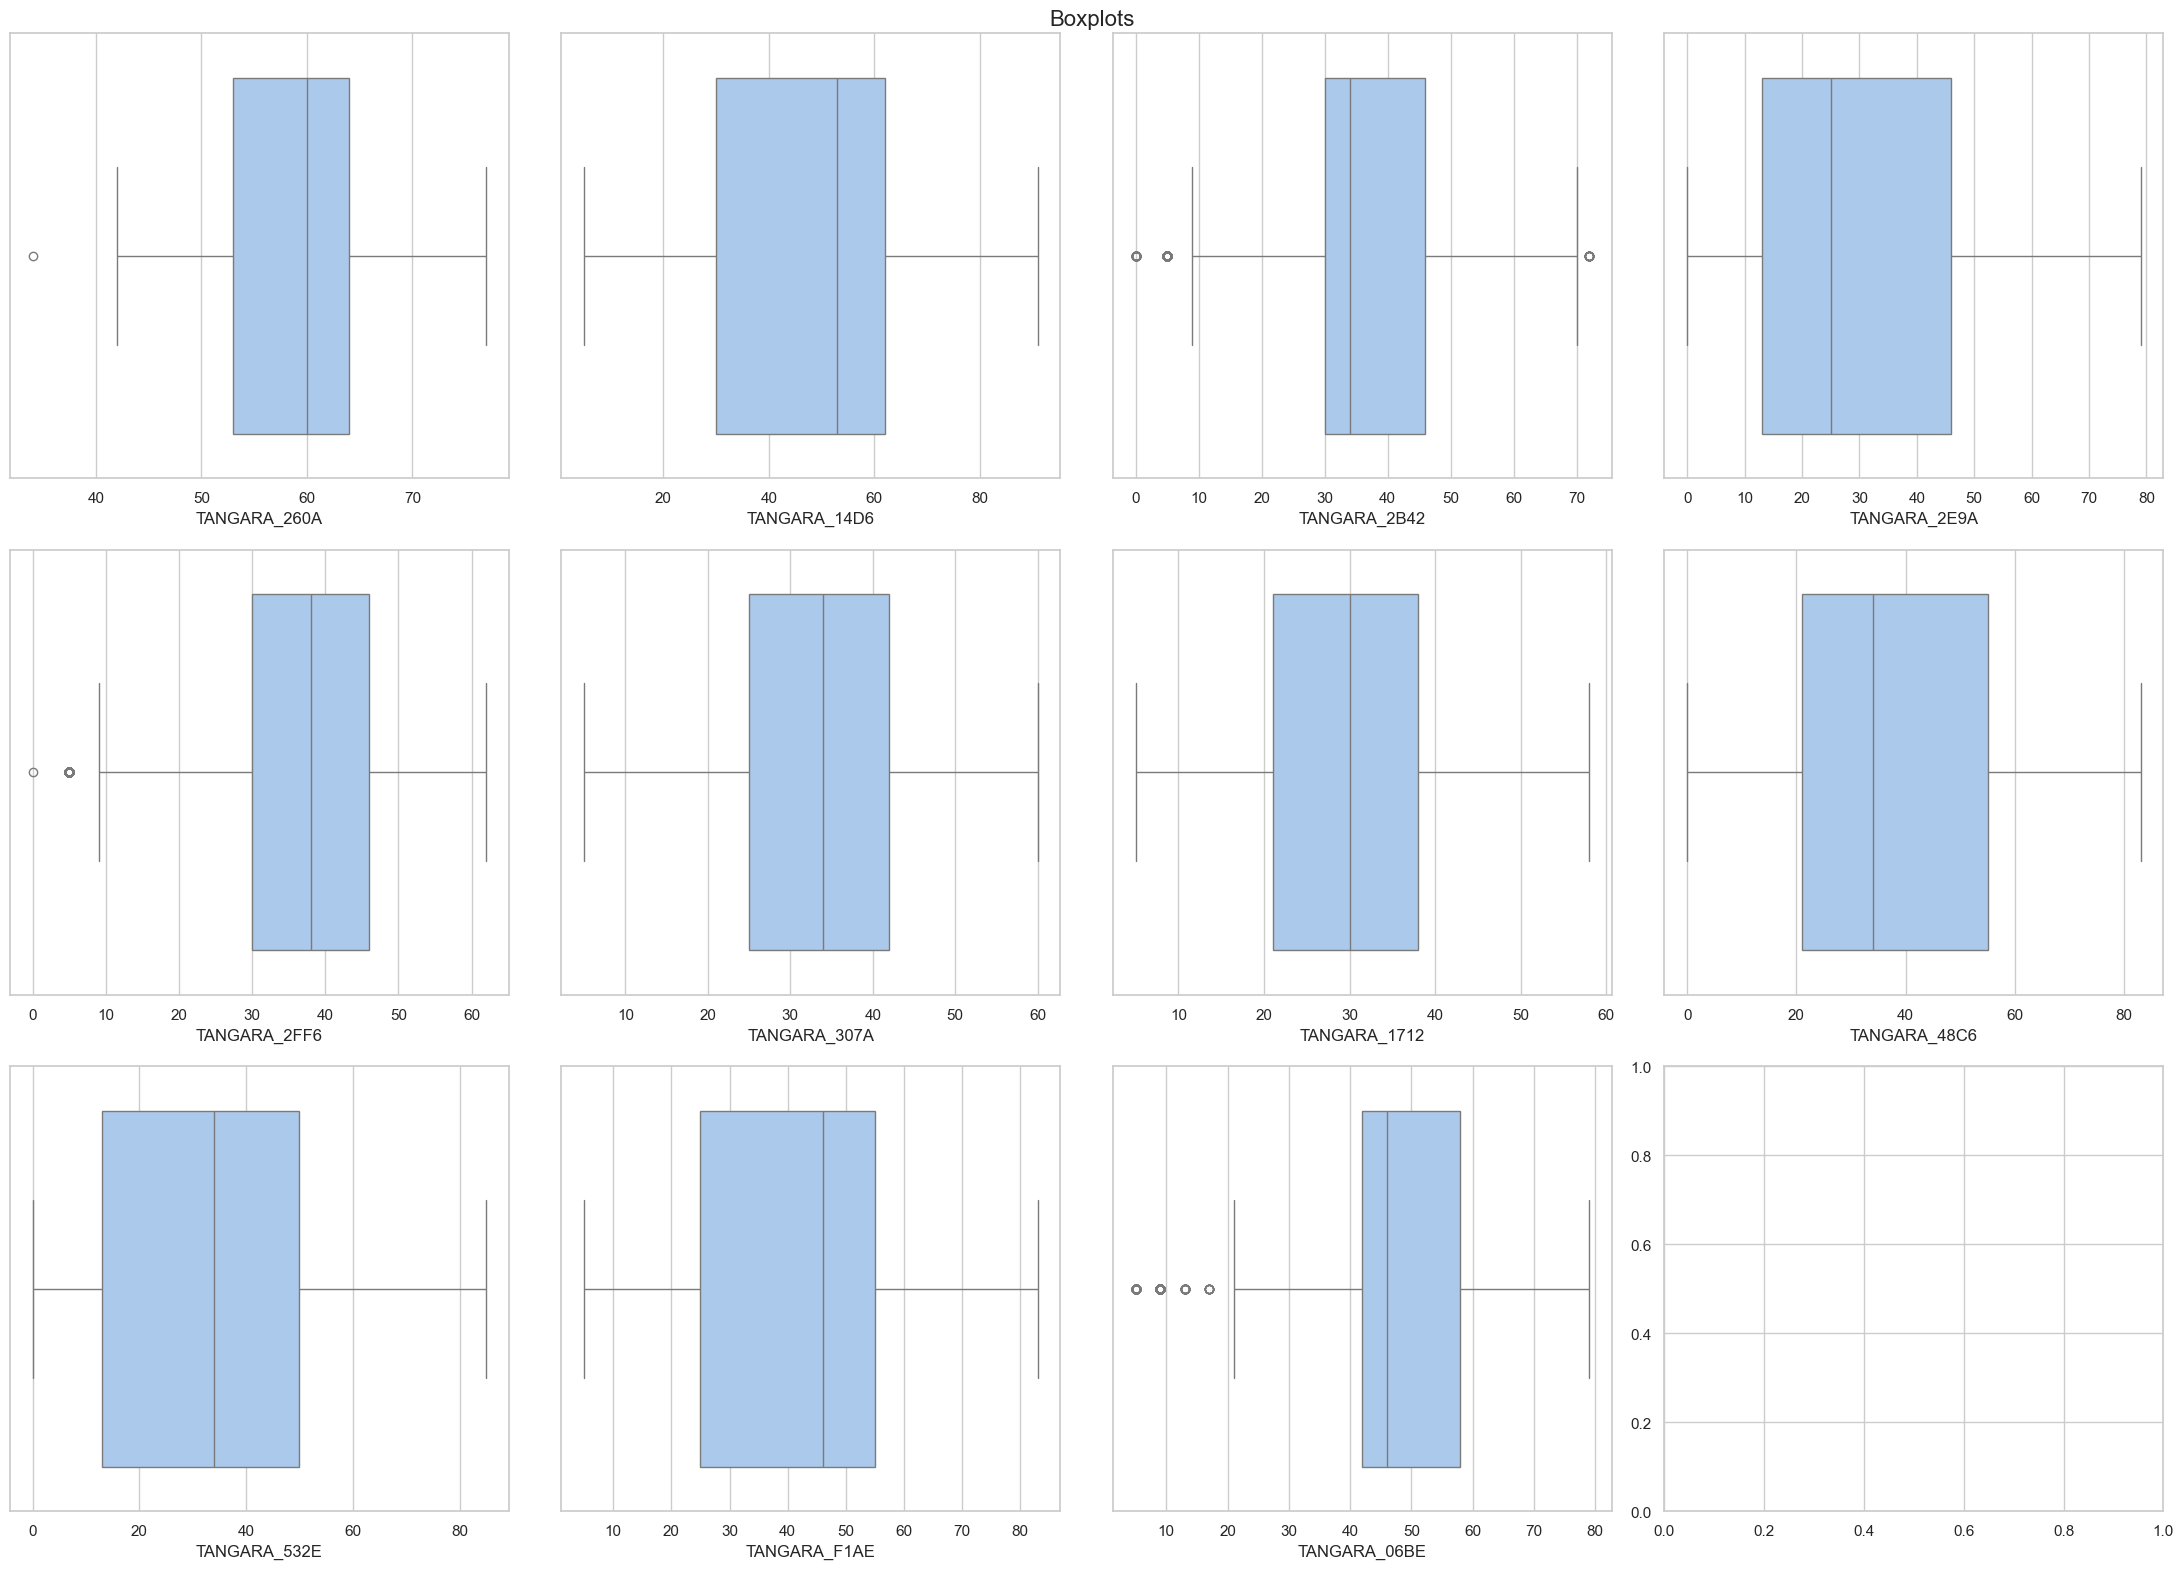

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

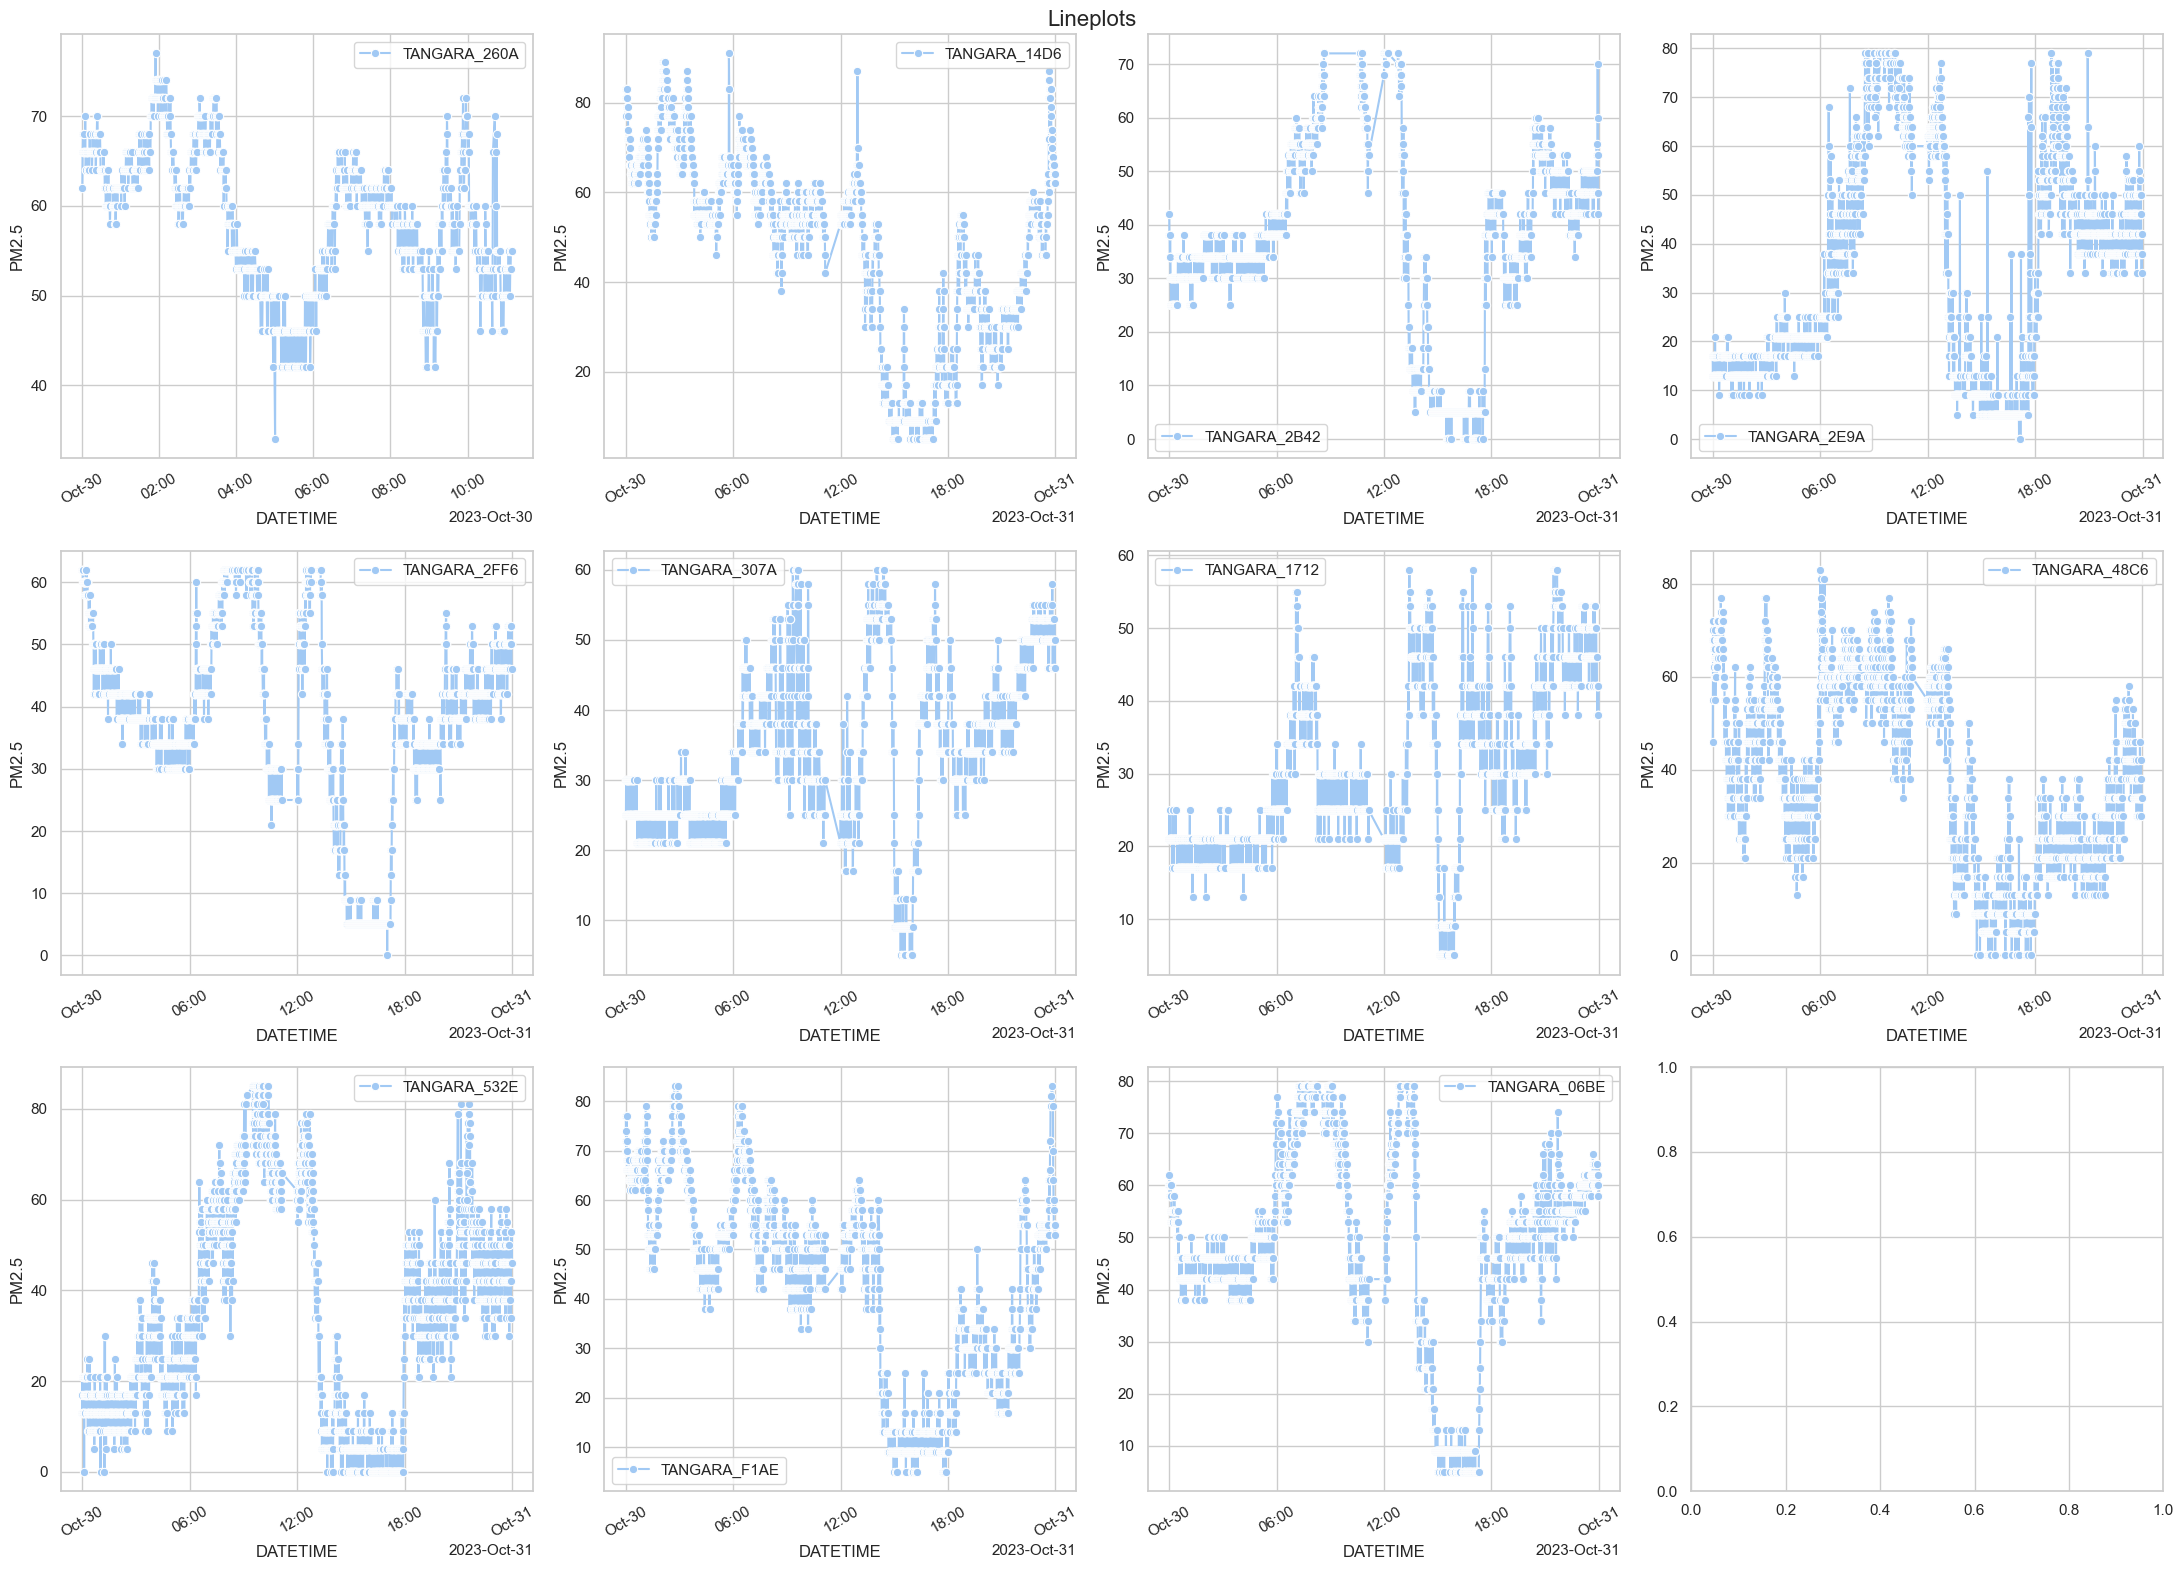

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')